In [ ]:
import torch
import numpy as np

from torch import nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
from tqdm.notebook import tqdm

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, state_space_dim: int = 28 * 28):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(state_space_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 12),
            nn.ReLU(True),
            nn.Linear(12, 3),
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, state_space_dim),
            nn.Tanh(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
def get_dataset(action_count: int, sample_count: int = 10000) -> Dataset:
    sample = torch.eye(action_count)
    result = torch.empty((sample_count, action_count))
    item = 0

    for index in range(sample_count):
        result[index] = sample[item]
        item = (item + 1) % action_count

    return result 

In [ ]:
train_epochs = 250
train_batch = 128
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset = get_dataset(3, 1000)
dataloader = DataLoader(dataset, batch_size=train_batch, shuffle=True)
model = Autoencoder(3).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [ ]:
for _ in range(train_epochs):
    for data in dataloader:
        batch = data[0]
        batch = batch.to(device)

        output = model(batch)
        loss = criterion(output, batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Loss: {:.4f}".format(loss.item()))

In [ ]:
model.eval()

obs = torch.tensor([[0, 0, 1.0]], device=device)
code = model.encoder(obs)
back = model.decoder(code)

print(obs)
print(code)
print(back.argmax(dim=1))

In [7]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:>

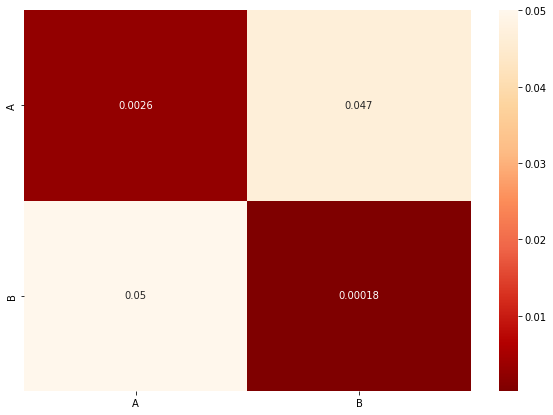

In [9]:
array = np.array([[0.00256135, 0.04658826],
          [0.05002331, 0.00017725]])
df_cm = pd.DataFrame(array, index = [i for i in "AB"], columns = [i for i in "AB"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd_r")